# XGBoost with Python and Scikit-Learn

# Table of Contents


# 1. Introduction to XGBoost algorithm

# 2. XGBoost algorithm intuition

# Gradient boosting

# XGBoost

# 3. The problem statement

# 4. Dataset description

# 5. Import libraries

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

In [463]:
import warnings
warnings.filterwarnings('ignore')

# 6. Import dataset

In [465]:
# Import dataset

df = pd.read_csv("/Users/babarhussain/MachineLearning/XGBoost/Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# 7. Exploratory Data Analysis

In [467]:
# I will start off by checking the shape of the dataset.
df.shape

(440, 8)

# Preview dataset

In [469]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# View summary of dataframe

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# View summary statistics of dataframe

In [473]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Check for missing values

In [475]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# 8. Declare feature vector and target variable


In [477]:
 X = df.drop('Channel', axis=1)
y = df['Channel']

#  let's take a look at feature vector(X) and target variable(y)


In [479]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [480]:
# convert labels into binary values

y [y==2] = 0
y[y==1] = 1

In [481]:
# again preview the y label
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

Now, I will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 
I will do it as follows.

In [483]:
!pip install xgboost

In [484]:
# import XGBoost
import xgboost as xgb
# define data_dmatrix
data_matrix = xgb.DMatrix(data=X, label=y)

# 9. Split data into separate training and test set


In [486]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# 10. Train the XGBoost classifier

# General parameters

# Booster parameters

# Learning task parameters

# Command line parameters


In [492]:
# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
           'objective':'binary:logistic',
           'max_depth': 4,
           'alpha' : 10,
           'learning_rate':1.0,
           'n_estimators':100
}

# instantiate the classifier
xgb_clf = XGBClassifier(**params)
# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [493]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


# 11. Make predictions with XGBoost Classifier


In [495]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

# 12. Check accuracy score


In [497]:
# check accuracy score
from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8977


# 13. k-fold Cross Validation using XGBoost


In [499]:
from xgboost import cv
params = {"objective":"binary:logistic",'colsample_bytree':0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
xgb_cv = cv(dtrain=data_matrix, params=params,nfold=3,num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [500]:
xgb_cv.head()


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.708101,0.008865,0.631793,0.031488
1,0.744709,0.018737,0.613458,0.018483
2,0.935373,0.001609,0.879930,0.028779
3,0.944174,0.004149,0.900408,0.012478
4,0.964123,0.001851,0.940227,0.005981


# 14. Feature importance with XGBoost


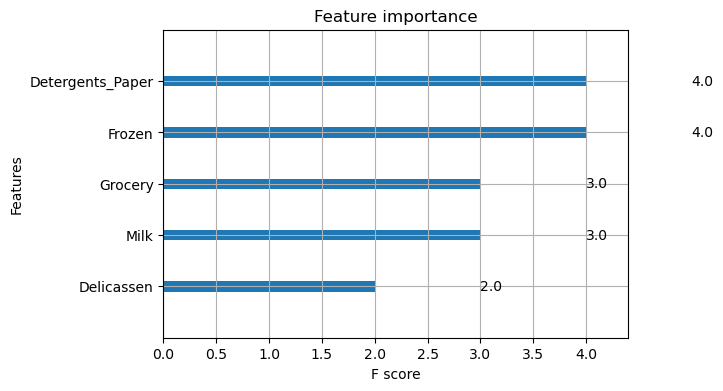

In [502]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

# 15. Results and conclusion